In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load and processes data
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(60000,28*28) / 255.0
test_images = test_images.reshape(10000,28*28) / 255.0

Text(0.5, 1.02, 'Sample MNIST Images with labels')

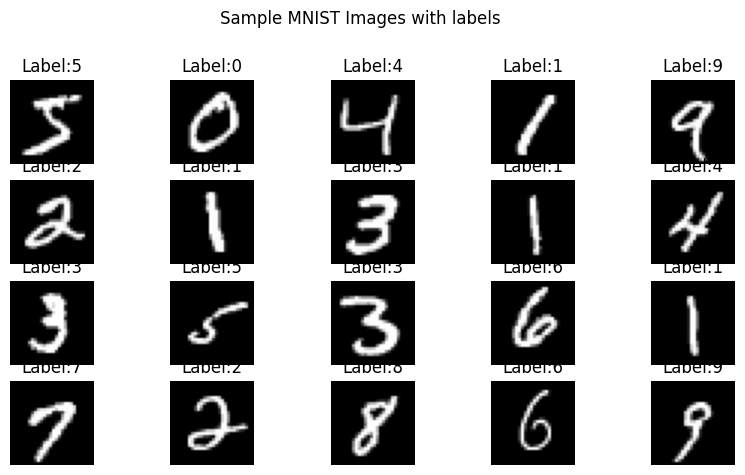

In [3]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"Label:{train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with labels',y=1.02)

In [29]:
model = models.Sequential([
    Dense(1024, activation='relu', input_shape=(28*28,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(10, activation='softmax')  # Output layer
])

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(train_images, train_labels,
                    epochs=30,  # increase from 10
                    batch_size=128,
                    validation_data=(test_images, test_labels),
                    )

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.8361 - loss: 0.5350 - val_accuracy: 0.9622 - val_loss: 0.1242
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9560 - loss: 0.1446 - val_accuracy: 0.9729 - val_loss: 0.0877
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9676 - loss: 0.1074 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9737 - loss: 0.0863 - val_accuracy: 0.9748 - val_loss: 0.0828
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9772 - loss: 0.0754 - val_accuracy: 0.9777 - val_loss: 0.0751
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9768 - loss: 0.0719 - val_accuracy: 0.9769 - val_loss: 0.0783
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9801 - val_loss: 0.0640
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9815 - loss: 0.0565 - 

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc: .4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9818 - loss: 0.0728

Test Accuracy:  0.9851


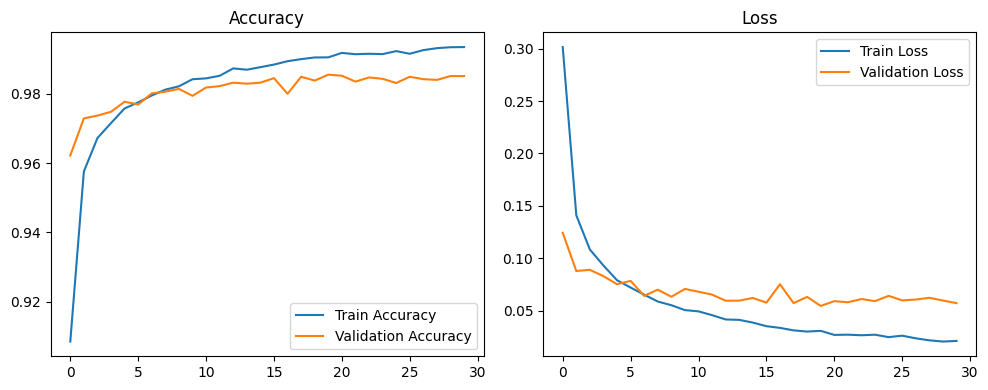

In [33]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


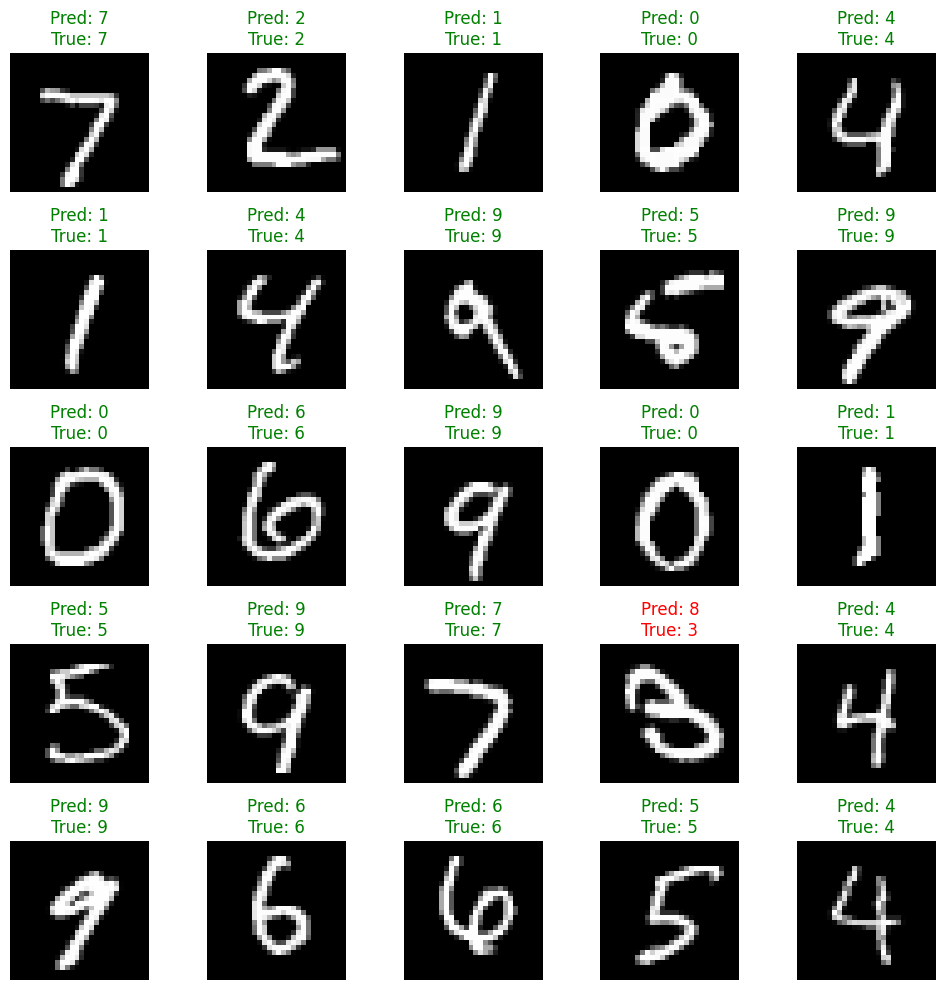

In [27]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()